### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

In [1]:
import numpy as np

np.random.seed(42)

In [2]:
import numpy as np
from modules.descents import BaseDescent, LossFunction

dimension = 2
model = BaseDescent(dimension=dimension, lambda_=1e-3, loss_function=LossFunction.MSE)

In [3]:
model.w = np.array([0.5, -0.5])

x_test = np.array([[2, 3],
                   [4, 5]])

expected_predictions = np.array([2 * 0.5 - 3 * 0.5, 4 * 0.5 - 5 * 0.5])
predictions = model.predict(x_test)

print("Predictions:", predictions)
print("Expected:", expected_predictions)
assert np.allclose(predictions, expected_predictions), "Predictions do not match"
print("Predict test passed:", np.allclose(predictions, expected_predictions))

y_test = np.array([0, 1])

calculated_loss = model.calc_loss(x_test, y_test)

expected_loss = np.mean((expected_predictions - y_test) ** 2)

print("Calculated Loss:", calculated_loss)
print("Expected Loss:", expected_loss)
assert np.isclose(calculated_loss, expected_loss), "Calculated Loss does not match expected loss"
print("Loss test passed:", np.isclose(calculated_loss, expected_loss))

Predictions: [-0.5 -0.5]
Expected: [-0.5 -0.5]
Predict test passed: True
Calculated Loss: 1.25
Expected Loss: 1.25
Loss test passed: True


### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

In [4]:
from sklearn.datasets import load_diabetes
from modules.descents import VanillaGradientDescent

ds_diabetes = load_diabetes()
x = ds_diabetes.data
y = ds_diabetes.target

vanilla = VanillaGradientDescent(dimension=x.shape[1])

diff_wights_1 = vanilla.step(x, y)
print(f"step 1: {vanilla.calc_loss(x, y)}")
diff_wights_2 = vanilla.step(x, y)
print(f"step 2: {vanilla.calc_loss(x, y)}")
diff_wights_3 = vanilla.step(x, y)
print(f"step 3: {vanilla.calc_loss(x, y)}")
diff_wights_1, diff_wights_2, diff_wights_3

step 1: 29067.57843162968
step 2: 29067.533414627975
step 3: 29067.49442946719


(array([ 0.0009684 ,  0.00021949,  0.00303426,  0.00228288,  0.0010923 ,
         0.0008956 , -0.00204266,  0.00222417,  0.00292679,  0.00197534]),
 array([ 0.00079068,  0.0001792 ,  0.00247744,  0.00186395,  0.00089184,
         0.00073124, -0.00166781,  0.001816  ,  0.00238969,  0.00161284]),
 array([ 0.00068474,  0.00015519,  0.00214551,  0.00161421,  0.00077235,
         0.00063326, -0.00144435,  0.00157269,  0.00206952,  0.00139674]))

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

In [5]:
from sklearn.datasets import load_diabetes
from modules.descents import StochasticDescent

ds_diabetes = load_diabetes()
x = ds_diabetes.data
y = ds_diabetes.target

stochastic = StochasticDescent(dimension=x.shape[1], batch_size=64)

diff_wights_1 = stochastic.step(x, y)
print(f"step 1: {stochastic.calc_loss(x, y)}")
diff_wights_2 = stochastic.step(x, y)
print(f"step 2: {stochastic.calc_loss(x, y)}")
diff_wights_3 = stochastic.step(x, y)
print(f"step 3: {stochastic.calc_loss(x, y)}")
diff_wights_1, diff_wights_2, diff_wights_3

step 1: 29068.12987295563
step 2: 29068.08148803638
step 3: 29068.06290165533


(array([-0.00022355,  0.00083544,  0.00288874,  0.00275519,  0.00100907,
         0.000345  ,  0.0002737 ,  0.0001982 ,  0.0014864 ,  0.00252798]),
 array([ 0.00073948,  0.00025539,  0.00435785,  0.00048773,  0.00101352,
         0.00148374, -0.00150037,  0.00235156,  0.00119151,  0.0024654 ]),
 array([-0.00070662, -0.00027466,  0.00052426, -0.00164583,  0.00196508,
         0.00272585, -0.00189233,  0.00268456,  0.00097468, -0.00062314]))

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

In [6]:
from sklearn.datasets import load_diabetes
from modules.descents import MomentumDescent

ds_diabetes = load_diabetes()
x = ds_diabetes.data
y = ds_diabetes.target

momentum = MomentumDescent(dimension=x.shape[1])

diff_wights_1 = momentum.step(x, y)
print(f"step 1: {momentum.calc_loss(x, y)}")
diff_wights_2 = momentum.step(x, y)
print(f"step 2: {momentum.calc_loss(x, y)}")
diff_wights_3 = momentum.step(x, y)
print(f"step 3: {momentum.calc_loss(x, y)}")
diff_wights_1, diff_wights_2, diff_wights_3

step 1: 29066.50676133158
step 2: 29066.412080122267
step 3: 29066.28786716305


(array([ 0.00097014,  0.00022164,  0.00303423,  0.00228202,  0.00109208,
         0.00089698, -0.00204496,  0.002226  ,  0.00292553,  0.00197671]),
 array([ 0.00166523,  0.00038044,  0.00520823,  0.00391707,  0.00187453,
         0.00153965, -0.00351016,  0.00382089,  0.00502164,  0.003393  ]),
 array([ 0.00218467,  0.00049909,  0.00683288,  0.00513895,  0.00245925,
         0.0020199 , -0.0046051 ,  0.00501276,  0.00658808,  0.0044514 ]))

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

In [7]:
from sklearn.datasets import load_diabetes
from modules.descents import Adam

ds_diabetes = load_diabetes()
x = ds_diabetes.data
y = ds_diabetes.target

momentum = Adam(dimension=x.shape[1])

diff_wights_1 = momentum.step(x, y)
print(f"step 1: {momentum.calc_loss(x, y)}")
diff_wights_2 = momentum.step(x, y)
print(f"step 2: {momentum.calc_loss(x, y)}")
diff_wights_3 = momentum.step(x, y)
print(f"step 3: {momentum.calc_loss(x, y)}")
diff_wights_1, diff_wights_2, diff_wights_3

step 1: 29066.358286455645
step 2: 29066.343861678935
step 3: 29066.33136950538


(array([ 0.00070711,  0.00070711,  0.00070711,  0.00070711,  0.00070711,
         0.00070711, -0.00070711,  0.00070711,  0.00070711,  0.00070711]),
 array([ 0.00057735,  0.00057735,  0.00057735,  0.00057735,  0.00057735,
         0.00057735, -0.00057735,  0.00057735,  0.00057735,  0.00057735]),
 array([ 0.0005,  0.0005,  0.0005,  0.0005,  0.0005,  0.0005, -0.0005,
         0.0005,  0.0005,  0.0005]))

## Задание 2. Реализация линейной регрессии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [8]:
%load_ext autoreload

In [9]:
%autoreload 2

import numpy as np

from modules.descents import get_descent
from modules.linear_regression import LinearRegression

In [10]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [11]:

descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [12]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

100%|██████████| 10/10 [00:00<00:00, 15899.56it/s]


In [13]:
regression.loss_history

[0.9974099984548537,
 0.9939031043520542,
 0.9914876665490513,
 0.9886674168316375,
 0.9856382414212477,
 0.9835571277022137,
 0.9813066698431722,
 0.9797271794239699,
 0.9784672496324941,
 0.9764975879395945,
 0.9757202177872363]

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from modules.descents import get_descent
from modules.linear_regression import LinearRegression

# sns.set(style='darkgrid')

In [15]:
data = pd.read_csv('data/autos.csv')

In [16]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

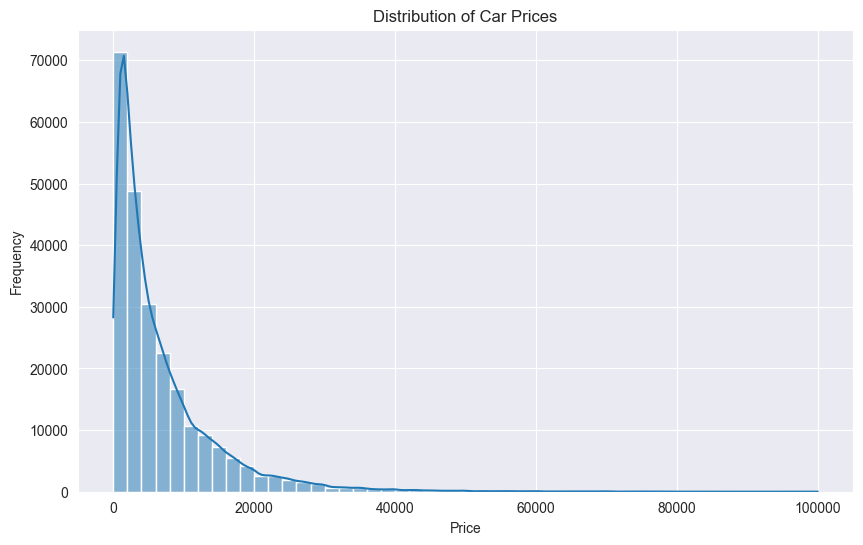

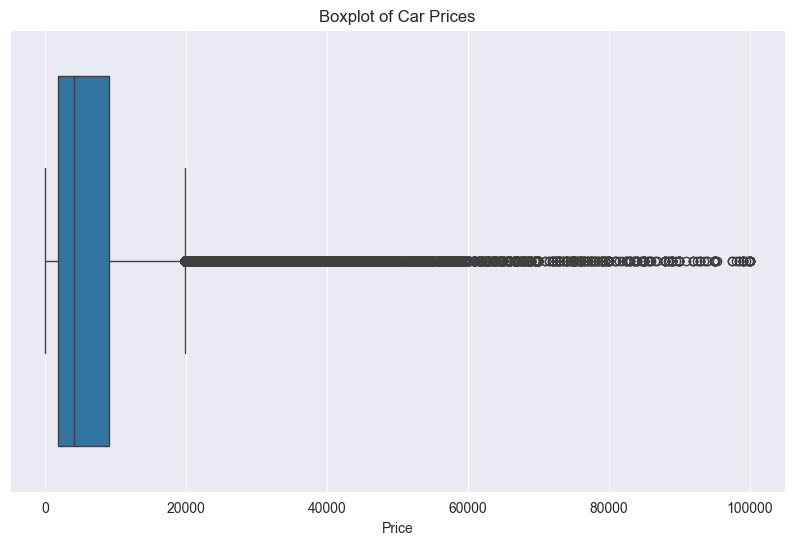

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()


Распределение цен на автомобили имеет сильный перекос вправо: большинство автомобилей сконцентрировано в нижнем ценовом диапазоне, а длинный хвост тянется в сторону более высоких цен. Эта асимметрия предполагает, что логарифмическое преобразование может помочь нормализовать распределение.

На диаграмме видно наличие многочисленных выбросов, особенно в верхнем ценовом диапазоне. Эти выбросы значительно превышают типичный диапазон цен для большинства автомобилей в наборе данных, что указывает на аномально высокие значения, которые потенциально могут исказить анализ и производительность модели.

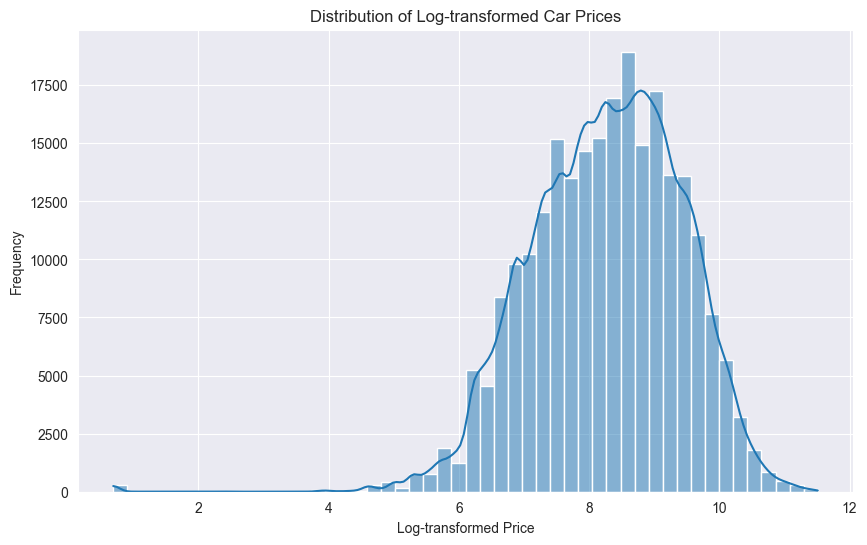

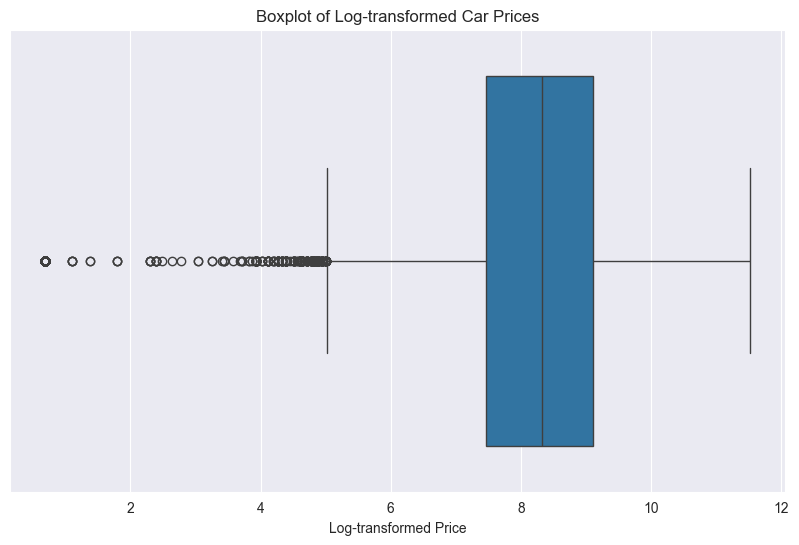

In [18]:
data['log_price'] = np.log1p(data['price'])

plt.figure(figsize=(10, 6))
sns.histplot(data['log_price'], kde=True, bins=50)
plt.title('Distribution of Log-transformed Car Prices')
plt.xlabel('Log-transformed Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['log_price'])
plt.title('Boxplot of Log-transformed Car Prices')
plt.xlabel('Log-transformed Price')
plt.show()


После применения логарифмического преобразования к целевой переменной (цене) мы наблюдаем более нормализованное распределение цен на автомобили. Цены, преобразованные логарифмически, показывают распределение, близкое к нормальному, с уменьшенной асимметрией. Эта трансформация эффективно смягчила последствия «длинного хвоста» высоких цен.

На boxplot диаграмме логарифмически преобразованных цен по-прежнему наблюдаются выбросы, но их влияние, вероятно, меньше по сравнению с исходной шкалой.

In [19]:

Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_filtered = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

original_size = data.shape[0]
filtered_size = data_filtered.shape[0]
removed_outliers = original_size - filtered_size

original_size, filtered_size, removed_outliers

(241190, 240399, 791)

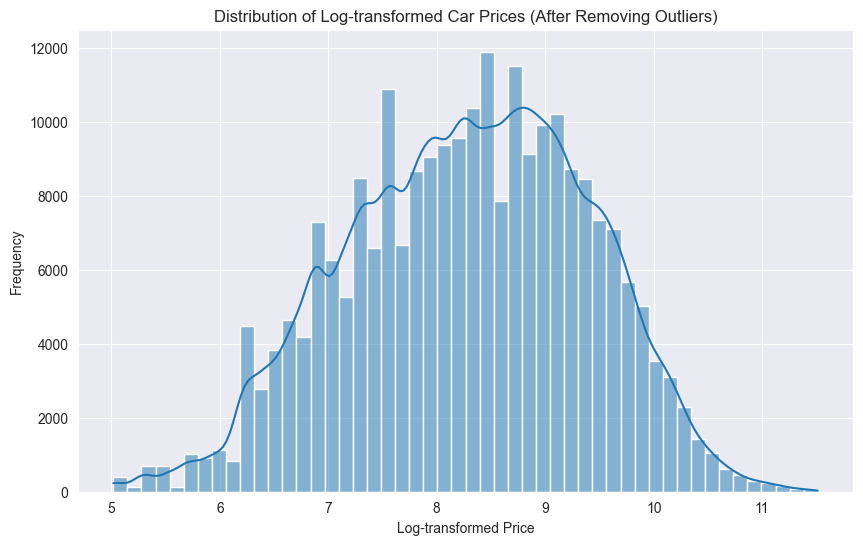

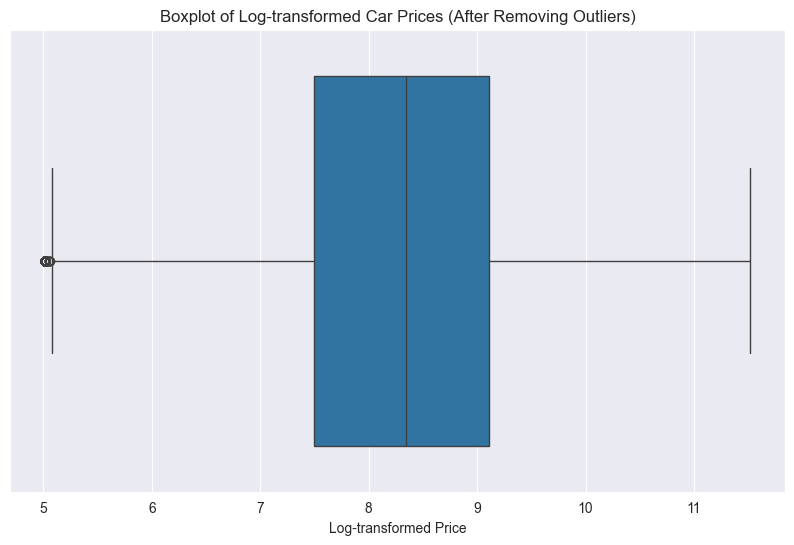

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['log_price'], kde=True, bins=50)
plt.title('Distribution of Log-transformed Car Prices (After Removing Outliers)')
plt.xlabel('Log-transformed Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_filtered['log_price'])
plt.title('Boxplot of Log-transformed Car Prices (After Removing Outliers)')
plt.xlabel('Log-transformed Price')
plt.show()


Гистограмма показывает более равномерное и симметричное распределение, что указывает на то, что преобразование и удаление выбросов сделали данные более подходящими для анализа и моделирования.

BoxPlot демонстрирует более чистое распределение с меньшим количеством выбросов, что должно помочь снизить влияние экстремальных значений на статистические модели.

In [21]:
data_filtered.dtypes


brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

<Axes: xlabel='vehicleType'>

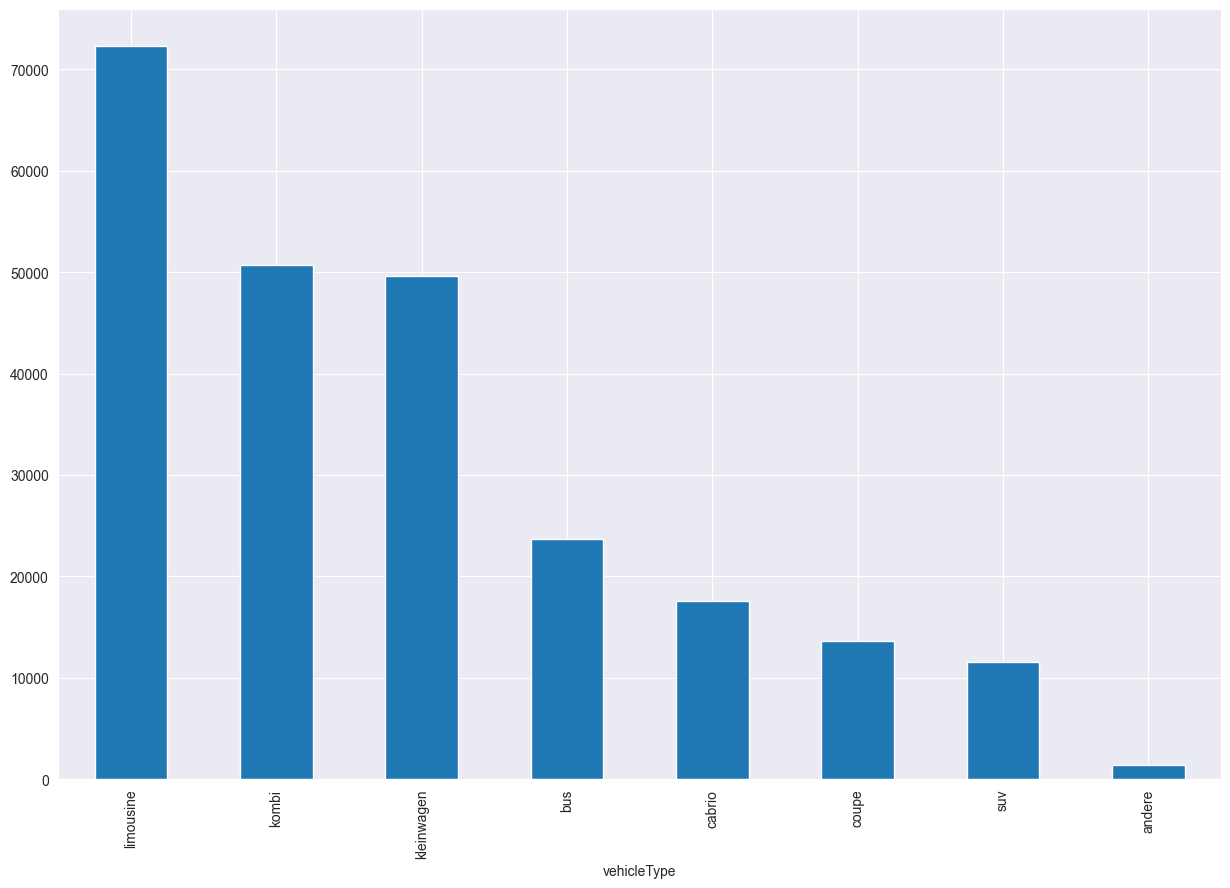

In [22]:
data_filtered.vehicleType.value_counts().plot(kind='bar', figsize=(15, 10))

<Axes: xlabel='brand'>

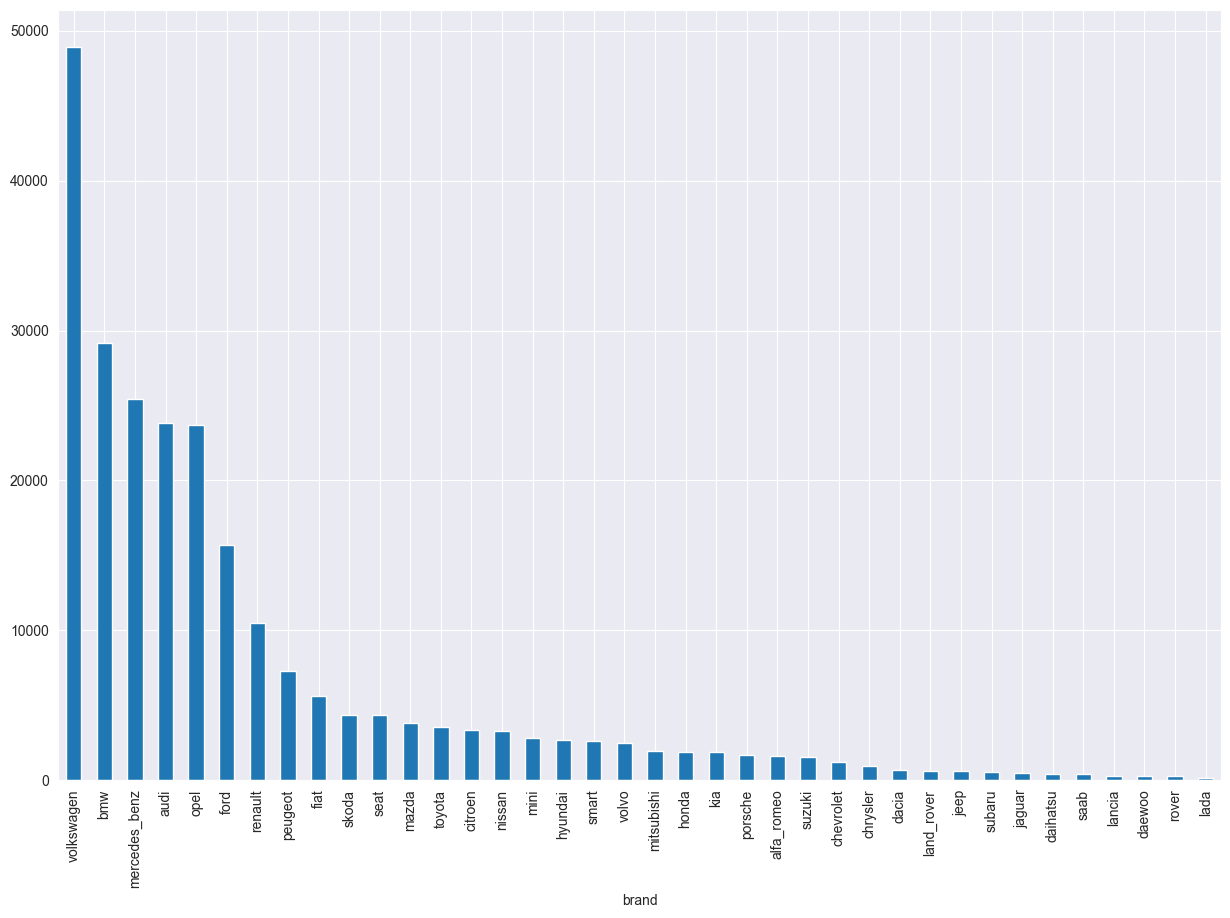

In [23]:
data_filtered.brand.value_counts().plot(kind='bar', figsize=(15, 10))

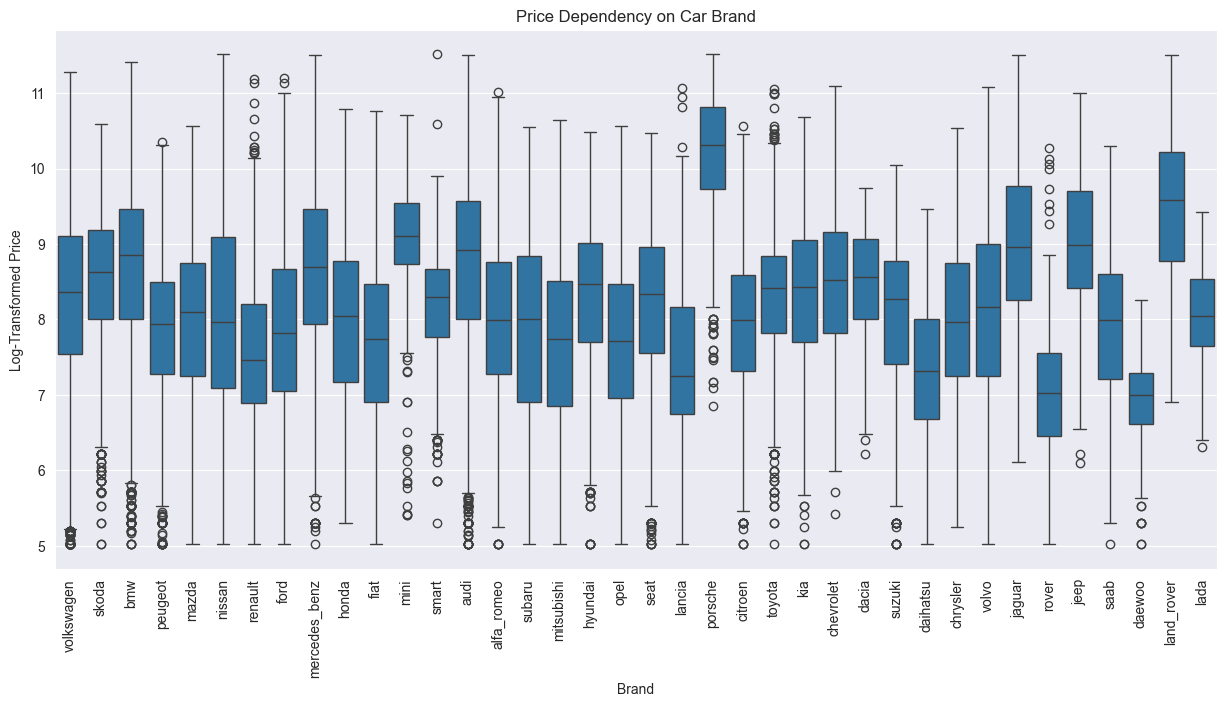

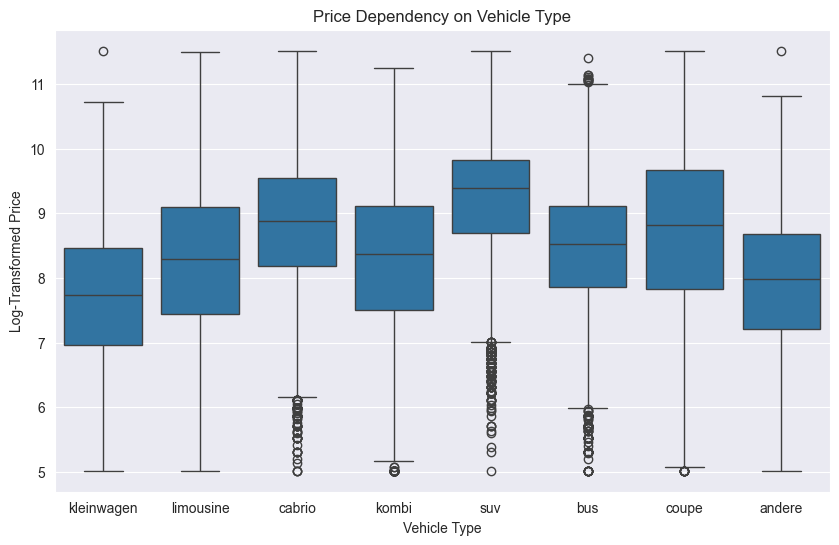

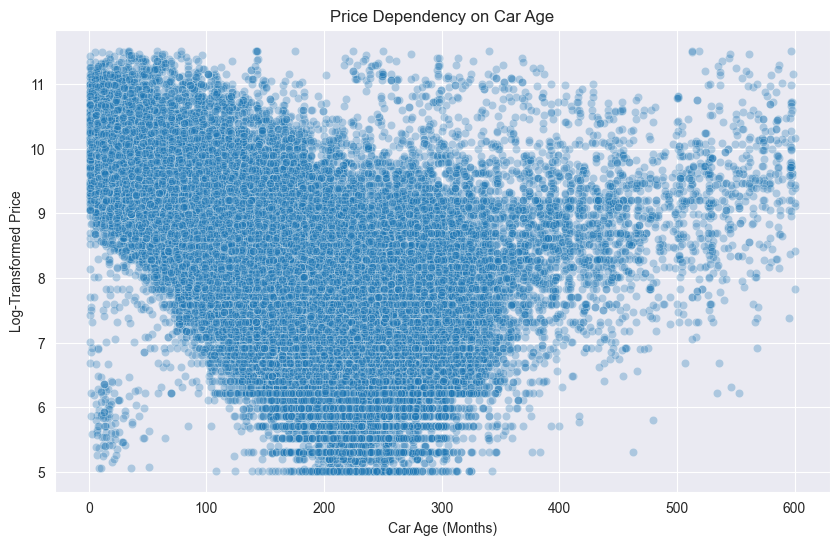

In [24]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='brand', y='log_price', data=data_filtered)
plt.xticks(rotation=90)
plt.title('Price Dependency on Car Brand')
plt.xlabel('Brand')
plt.ylabel('Log-Transformed Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='vehicleType', y='log_price', data=data_filtered)
plt.title('Price Dependency on Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Log-Transformed Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='autoAgeMonths', y='log_price', data=data_filtered, alpha=0.3)
plt.title('Price Dependency on Car Age')
plt.xlabel('Car Age (Months)')
plt.ylabel('Log-Transformed Price')
plt.show()


**Зависимость цены от марки автомобиля:** Цена значительно варьируется в зависимости от марки автомобиля. Некоторые марки, такие как Mercedes-Benz, BMW, и Audi, демонстрируют более высокие медианные цены по сравнению с другими марками, такими как Ford и Opel. Это указывает на то, что марка автомобиля может быть важным фактором, влияющим на цену.

**Зависимость цены от типа кузова:** Тип кузова также влияет на цену автомобиля. Кузова типа "coupe" (купе) и "suv" имеют более высокие медианные цены, в то время как "kleinwagen" (малолитражки) и "kombi" (универсалы) имеют более низкие медианные цены. Это подчеркивает важность типа кузова как признака для предсказания цены.

**Зависимость цены от возраста автомобиля:** Существует обратная зависимость между возрастом автомобиля и его ценой, что логично — более новые автомобили обычно стоят дороже. Этот тренд виден на графике, где с увеличением возраста автомобиля (в месяцах) медианная цена уменьшается.

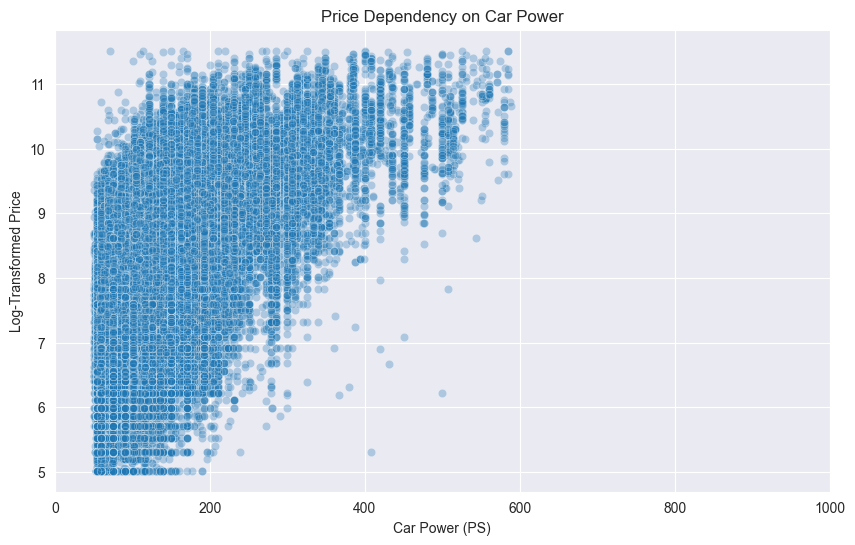

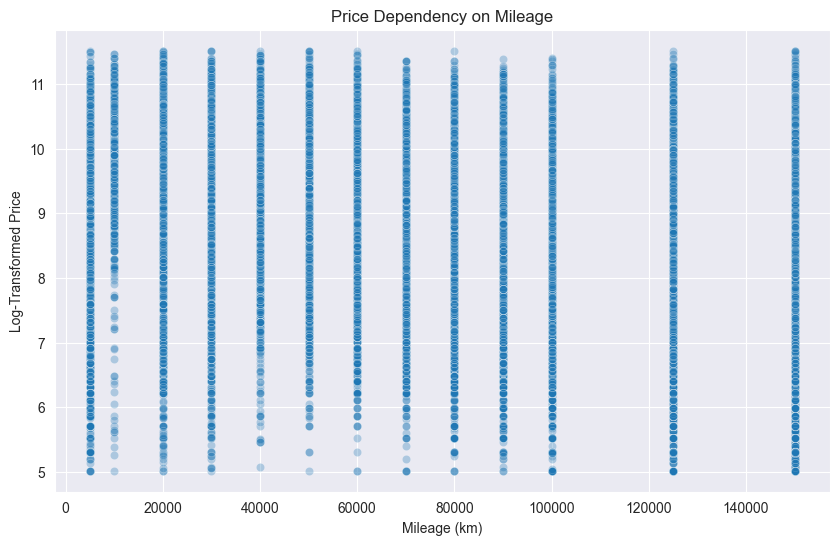

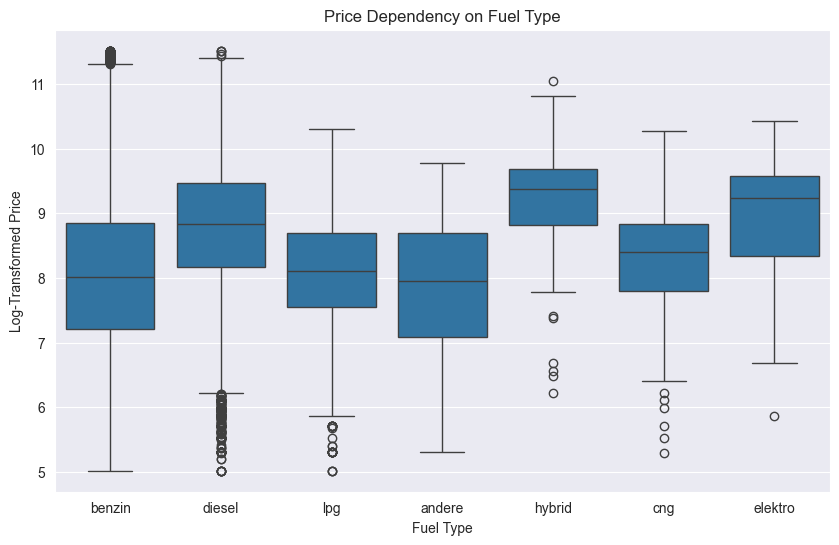

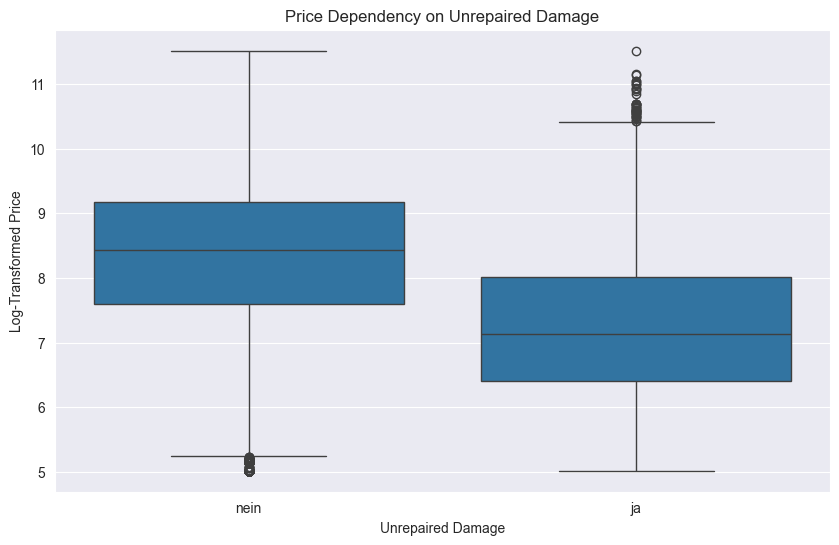

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='powerPS', y='log_price', data=data_filtered, alpha=0.3)
plt.title('Price Dependency on Car Power')
plt.xlabel('Car Power (PS)')
plt.ylabel('Log-Transformed Price')
plt.xlim(0, 1000)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometer', y='log_price', data=data_filtered, alpha=0.3)
plt.title('Price Dependency on Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Log-Transformed Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='fuelType', y='log_price', data=data_filtered)
plt.title('Price Dependency on Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Log-Transformed Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='notRepairedDamage', y='log_price', data=data_filtered)
plt.title('Price Dependency on Unrepaired Damage')
plt.xlabel('Unrepaired Damage')
plt.ylabel('Log-Transformed Price')
plt.show()

<Axes: xlabel='kilometer'>

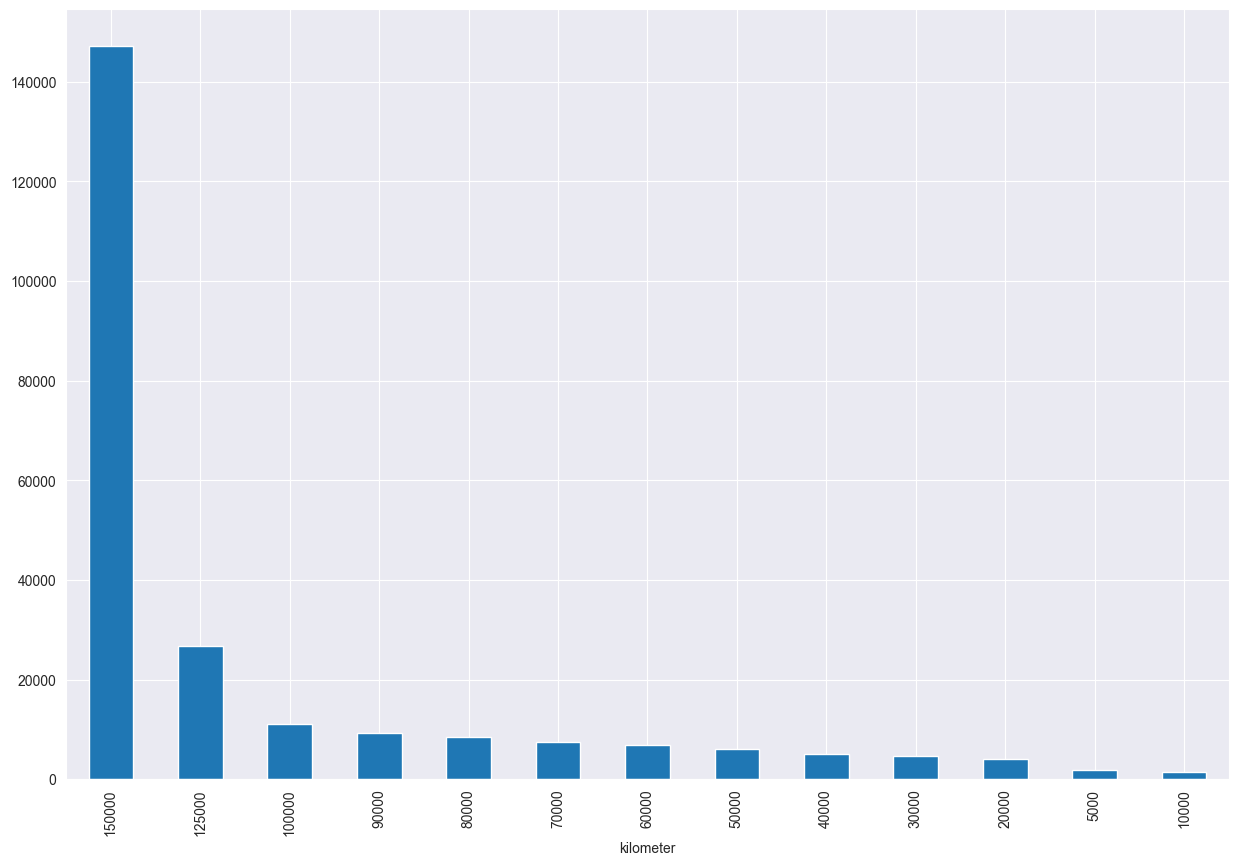

In [26]:
data_filtered.kilometer.value_counts().plot(kind='bar', figsize=(15, 10))

<Axes: xlabel='fuelType'>

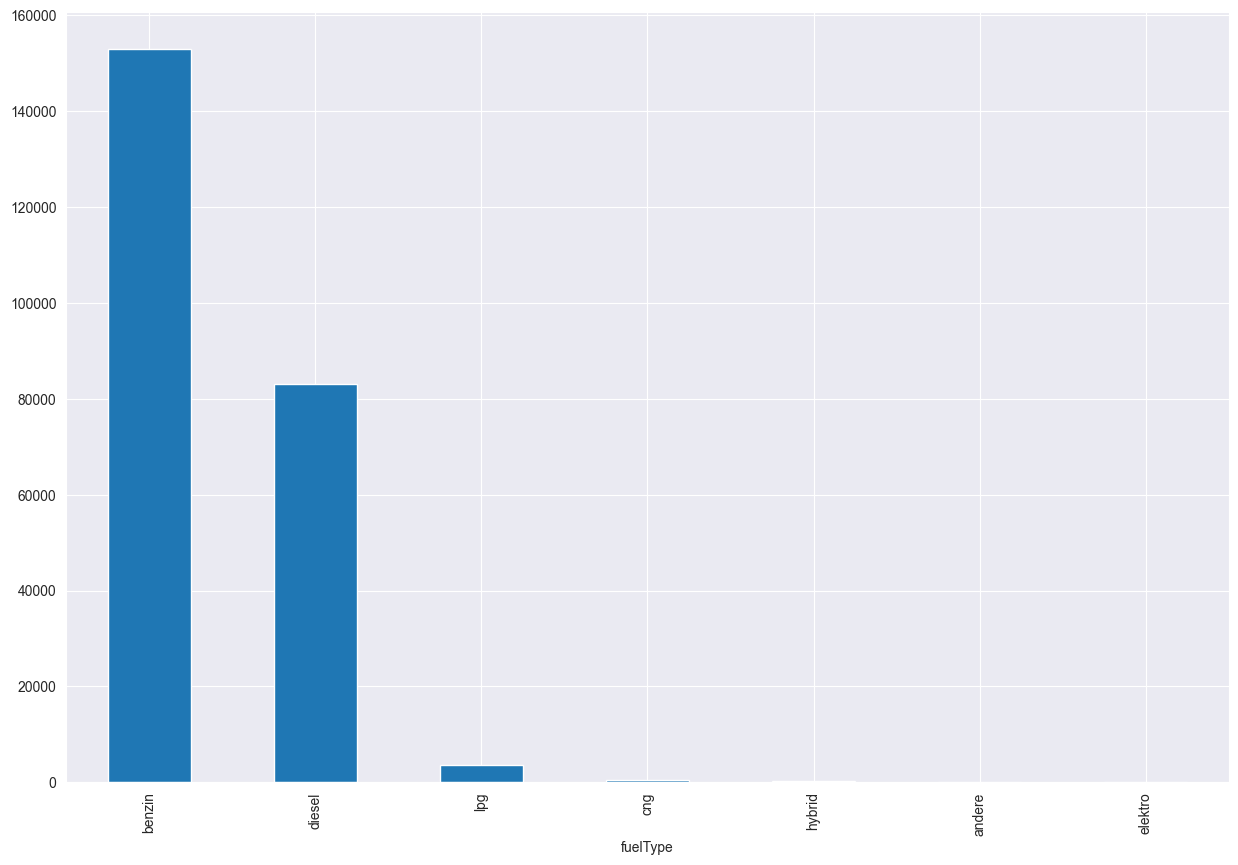

In [27]:
data_filtered.fuelType.value_counts().plot(kind='bar', figsize=(15, 10))

<Axes: xlabel='notRepairedDamage'>

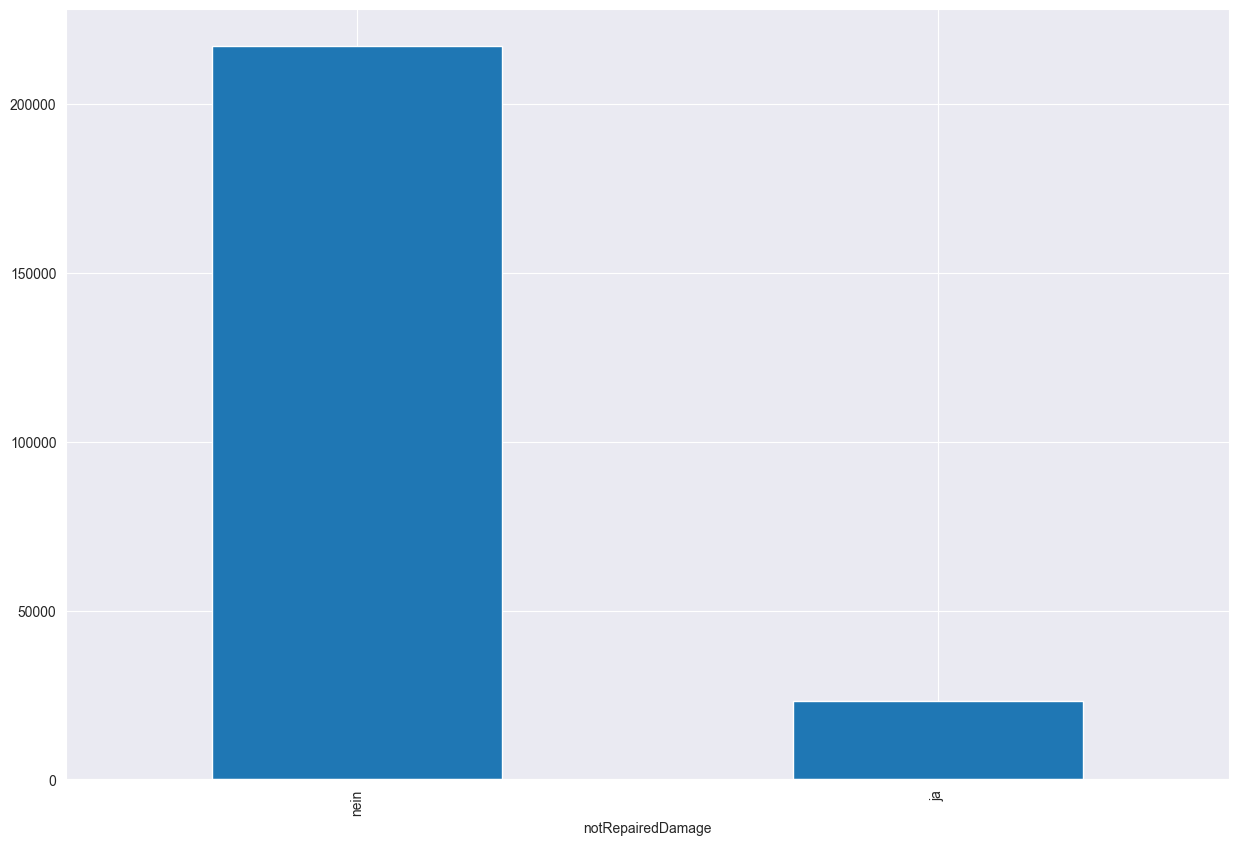

In [28]:
data_filtered.notRepairedDamage.value_counts().plot(kind='bar', figsize=(15, 10))

**Мощность автомобиля (powerPS):** Наблюдается положительная корреляция между мощностью автомобиля и его ценой — более мощные автомобили обычно стоят дороже. Однако видны выбросы с очень высоким или очень низким значением мощности, которые не соответствуют общей тенденции.

**Пробег (kilometer):** С увеличением пробега наблюдается тенденция к снижению цены автомобиля. Это соответствует ожидаемому влиянию износа на стоимость автомобиля.

**Тип топлива (fuelType):** Цена автомобиля варьируется в зависимости от типа используемого топлива. Автомобили на бензине и дизеле имеют различные распределения цен, при этом электрические и гибридные автомобили могут демонстрировать отличия в цене, в зависимости от доступности и выборки данных.

**Наличие неремонтированных повреждений (notRepairedDamage):** Автомобили с неремонтированными повреждениями в среднем имеют более низкую цену, чем автомобили без повреждений. Это подчеркивает важность состояния автомобиля при оценке его стоимости.

<Axes: xlabel='model'>

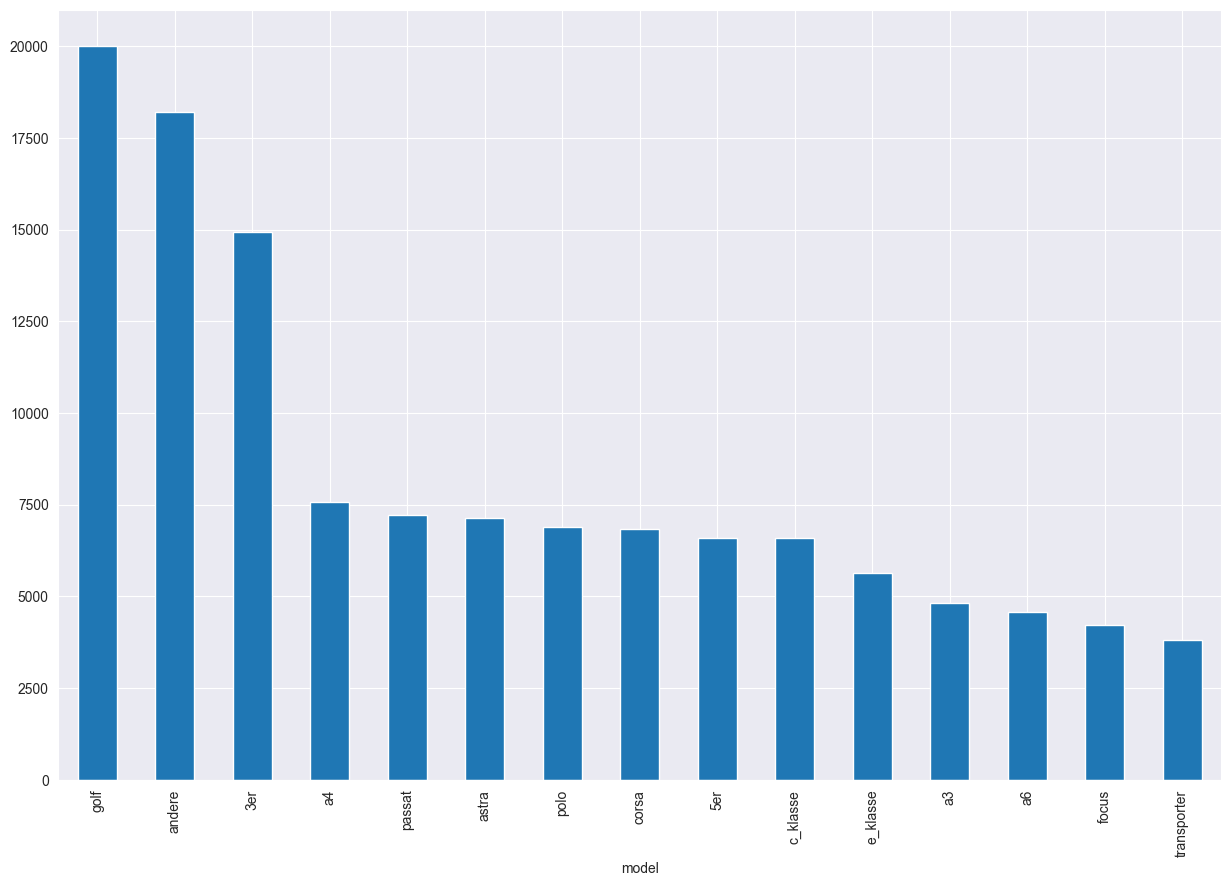

In [29]:
data_filtered.model.value_counts().head(15).plot(kind='bar', figsize=(15, 10))

<Axes: xlabel='gearbox'>

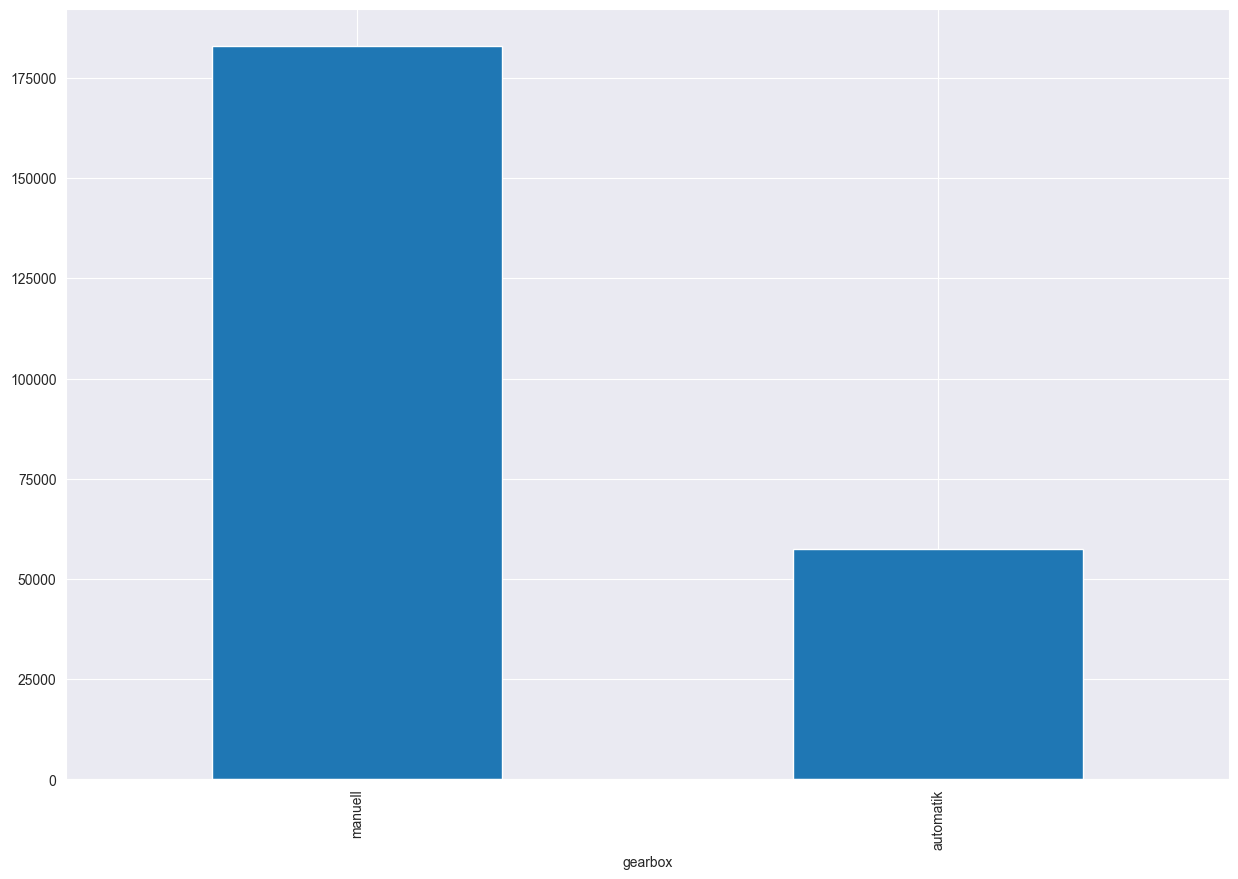

In [30]:
data_filtered.gearbox.value_counts().plot(kind='bar', figsize=(15, 10))

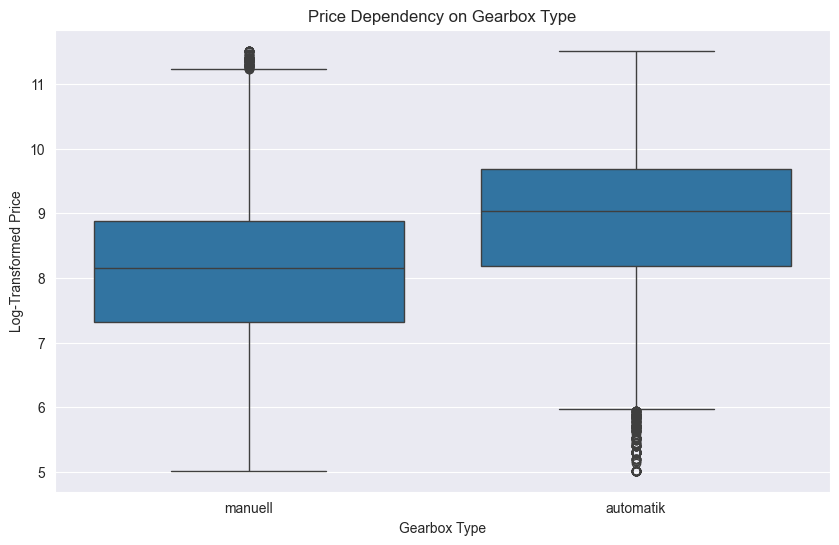

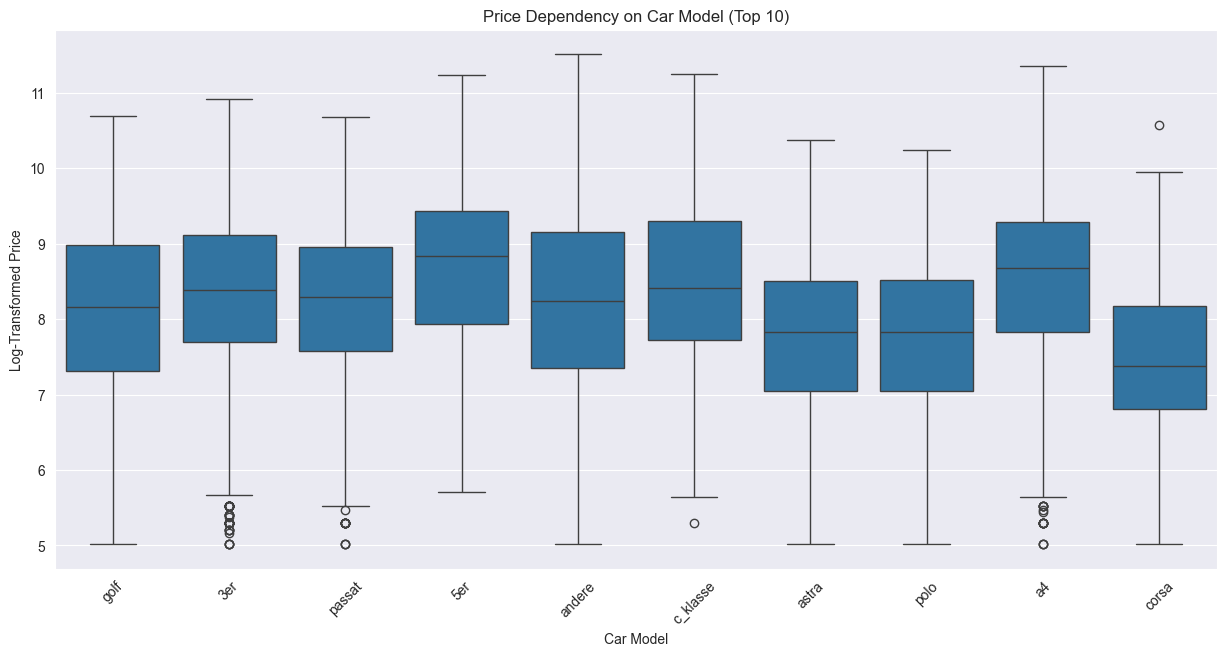

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gearbox', y='log_price', data=data_filtered)
plt.title('Price Dependency on Gearbox Type')
plt.xlabel('Gearbox Type')
plt.ylabel('Log-Transformed Price')
plt.show()

top_models = data_filtered['model'].value_counts().head(10).index
data_top_models = data_filtered[data_filtered['model'].isin(top_models)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='model', y='log_price', data=data_top_models)
plt.title('Price Dependency on Car Model (Top 10)')
plt.xlabel('Car Model')
plt.ylabel('Log-Transformed Price')
plt.xticks(rotation=45)
plt.show()


**Тип коробки передач (gearbox):** Цена автомобиля зависит от типа коробки передач. Автомобили с автоматической коробкой передач в среднем стоят дороже, чем с механической. Это может отражать предпочтения покупателей, а также факт, что автоматические трансмиссии часто устанавливаются на более дорогие и хорошо оснащенные модели.

**Модель автомобиля (model):** Существует значительное варьирование цен в зависимости от модели автомобиля. Некоторые модели, как видно из графика для топ-10 по популярности, имеют различные медианные цены и диапазоны цен, что подчеркивает значимость модели автомобиля как фактора, влияющего на его стоимость. Модели вроде "golf" от Volkswagen показывают широкий диапазон цен, отражающий разнообразие версий и комплектаций.

Каждая из фичей вносят достаточный вклад в цену, чтобы их рассмотреть при моделировании.

In [32]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [33]:
data_filtered['bias'] = 1
other += ['bias']

x = data_filtered[categorical + numeric + other]
y = data_filtered['log_price']

/var/folders/nn/6tfq3jb17_3ch80d_ms1jhshpmv9tw/T/ipykernel_82128/2647504863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['bias'] = 1


In [34]:
x.shape

(240399, 10)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other', 'passthrough', other)
])

x = column_transformer.fit_transform(x)
y = y.to_numpy()

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 192319 samples
Validation set size: 24040 samples
Test set size: 24040 samples


In [37]:
x.shape

(240399, 310)

In [38]:
y.shape

(240399,)

In [39]:
# test postprocessor_target_transformer: np.expm1

max_iter = 1000
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'batch_size': 10,
        'postprocessor_target_transformer': np.expm1
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

100%|██████████| 1000/1000 [00:02<00:00, 404.91it/s]


In [40]:
regression.loss_history[:5], regression.loss_history[-5:]

([110076215.80547181,
  110038584.07854727,
  110010168.95571098,
  109977069.66117351,
  109953826.63258821],
 [105363423.23234838,
  105358991.57715802,
  105358452.61068313,
  105356358.37812965,
  105350847.17585737])

In [41]:
# test postprocessor_target_transformer: None

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x.shape[1],
        'batch_size': 10,
        # 'postprocessor_target_transformer': np.expm1
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

100%|██████████| 1000/1000 [00:01<00:00, 867.23it/s]


In [42]:
regression.loss_history[:5], regression.loss_history[-5:]

([24.742431177566267,
  24.553444888516324,
  24.350681275464627,
  24.20429292629069,
  24.095074152988612],
 [12.367641207633637,
  12.363935199241222,
  12.357648861095985,
  12.354176041621148,
  12.351082280305558])

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [43]:
import matplotlib.pyplot as plt


def plot_res(results):
    lambdas = [result['lambda'] for result in results]
    train_errors = [result['train_error'] for result in results]
    val_errors = [result['val_error'] for result in results]
    train_r2s = [result['train_r2'] for result in results]
    val_r2s = [result['val_r2'] for result in results]

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(lambdas, train_errors, label='Train Error', marker='o')
    ax[0].plot(lambdas, val_errors, label='Validation Error', marker='x')
    ax[0].set_xscale('log')
    ax[0].set_xlabel('Lambda')
    ax[0].set_ylabel('MSE Error')
    ax[0].set_title('Error vs. Lambda')
    ax[0].legend()

    ax[1].plot(lambdas, train_r2s, label='Train R2', marker='o')
    ax[1].plot(lambdas, val_r2s, label='Validation R2', marker='x')
    ax[1].set_xscale('log')
    ax[1].set_xlabel('Lambda')
    ax[1].set_ylabel('R^2 Score')
    ax[1].set_title('R^2 vs. Lambda')
    ax[1].legend()

    plt.show()


In [44]:
max_iter = int(1.8e3)
tolerance = 1e-3
num_log_ticks = 30
lambda_range = np.logspace(-4, 1, num=num_log_ticks)

In [45]:
import os
import concurrent
from tqdm.notebook import tqdm
from concurrent.futures import ProcessPoolExecutor
from utils.regression_helpers import fit_and_evaluate_task51

metrics = {
    "full": {"cfg": {
        'descent_name': 'full',
        'kwargs': {
            'dimension': x.shape[1],
            'loss_function': LossFunction.MSE
        }
    },
        "metrics": [],
    },
    "stochastic": {"cfg": {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': x.shape[1],
            'batch_size': 64,
            'loss_function': LossFunction.MSE
        }
    },
        "metrics": [],
    },
    "momentum": {"cfg": {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': x.shape[1],
            'alpha': 0.9,
            'loss_function': LossFunction.MSE
        }
    },
        "metrics": [],
    },
    "adam": {"cfg": {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': x.shape[1],
            'eps': 1e-8,
            'beta_1': 0.9,
            'beta_2': 0.999,
            'loss_function': LossFunction.MSE
        }
    },
        "metrics": [],
    },
}

num_workers = os.cpu_count()
print(f"num_workers: {num_workers}")


def run_in_parallel(num_workers, metrics, lambda_range, tolerance, max_iter, x, y, X_train, y_train, X_val, y_val):
    tasks = []
    with ProcessPoolExecutor(max_workers=num_workers) as executor:
        for cfg_name, cfg_info in metrics.items():
            for lambda_value in lambda_range:
                task = executor.submit(
                    fit_and_evaluate_task51,
                    cfg_name,
                    lambda_value,
                    cfg_info["cfg"],
                    tolerance,
                    max_iter,
                    X_train, y_train, X_val, y_val
                )
                tasks.append(task)

        for future in tqdm(concurrent.futures.as_completed(tasks), total=len(tasks)):
            cfg_name, result = future.result()
            metrics[cfg_name]["metrics"].append(result)


run_in_parallel(num_workers, metrics, lambda_range, tolerance, max_iter, x, y, X_train, y_train, X_val, y_val)

num_workers: 12


  0%|          | 0/120 [00:00<?, ?it/s]

 13%|█▎        | 238/1800 [00:03<00:21, 72.40it/s]/Users/dmitrii.koriakov/miniconda3/envs/mai-ml-grad-desc-lab4/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
 24%|██▍       | 433/1800 [00:05<00:18, 75.64it/s]/Users/dmitrii.koriakov/PycharmProjects/mai-ml-grad-desc-lab4/modules/descents.py:217: RuntimeWarning: overflow encountered in square
  return float(np.mean((y_pred - y) ** 2).squeeze())
 20%|█▉        | 356/1800 [00:05<00:22, 64.55it/s]/Users/dmitrii.koriakov/miniconda3/envs/mai-ml-grad-desc-lab4/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
  6%|▋         | 114/1800 [00:00<00:06, 268.10it/s]/Users/dmitrii.koriakov/PycharmProjects/mai-ml-grad-desc-lab4/modules/descents.py:217: RuntimeWarning: overflow encountered in square
  return float(np.mean((

In [46]:
import json


def replace_loss_function_with_string(input_dict):
    """
    Recursively searches through the dictionary and replaces LossFunction enum values with their string names.
    
    Parameters
    ----------
    input_dict : dict
        The input dictionary potentially containing LossFunction enum values.
    
    Returns
    -------
    dict
        A new dictionary with LossFunction enum values replaced by their string names.
    """
    if isinstance(input_dict, dict):
        return {key: replace_loss_function_with_string(value) for key, value in input_dict.items()}
    elif isinstance(input_dict, list):
        return [replace_loss_function_with_string(item) for item in input_dict]
    elif isinstance(input_dict, LossFunction):
        return input_dict.name
    else:
        return input_dict


metrics_with_strings = replace_loss_function_with_string(metrics)

with open("metrics/search_lambda.json", "w", encoding="utf8") as f:
    json.dump(metrics_with_strings, f, ensure_ascii=False)

In [47]:
def validate(value):
    # print(f"value {value}: {np.isnan(value)} or {np.isinf(value)} or {np.isfinite(value)}")
    return (not (np.isnan(value) or np.isinf(value) or not np.isfinite(value))) and (
        not (np.isnan(np.log(value)) or np.isinf(np.log(value)) or not np.isfinite(np.log(value))))


# Universal filtering function to ensure alignment
def filter_all_metrics(metrics_data):
    filtered_data = {method: {"lambdas": [], "train_errors": [], "val_errors": [], "train_r2s": [], "val_r2s": [],
                              "last_iteration_step": []} for method in descent_methods}
    for method in descent_methods:
        for i, lambda_value in enumerate(metrics_data[method]["lambdas"]):
            train_error = metrics_data[method]["train_errors"][i]
            val_error = metrics_data[method]["val_errors"][i]
            train_r2 = metrics_data[method]["train_r2s"][i]
            val_r2 = metrics_data[method]["val_r2s"][i]
            last_iteration_step = metrics_data[method]["last_iteration_step"][i]

            if validate(train_error) and validate(val_error) and validate(train_r2) and validate(val_r2):
                # if train_error < 0:
                #     print(f"train_error < 0: {train_error} < 0")
                # if val_error < 0:
                #     print(f"val_error < 0: {val_error} < 0")

                filtered_data[method]["lambdas"].append(lambda_value)
                filtered_data[method]["train_errors"].append(train_error)
                filtered_data[method]["val_errors"].append(val_error)
                # filtered_data[method]["train_r2s"].append(-train_r2 if train_r2 < 0 else val_r2)
                # filtered_data[method]["val_r2s"].append(-val_r2 if val_r2 < 0 else val_r2)
                filtered_data[method]["train_r2s"].append(train_r2)
                filtered_data[method]["val_r2s"].append(val_r2)
                filtered_data[method]["last_iteration_step"].append(last_iteration_step)
            # else:
            #     print(f"lambda_value: {lambda_value}; train_error: {train_error}; val_errors: {val_error}; train_r2s: {train_r2}; val_r2s: {val_r2}")
            #     print(f"lambda_value: {lambda_value}; VALS: train_error: {validate(train_error)}; val_errors: {validate(val_error)}; train_r2s: {validate(train_r2)}; val_r2s: {validate(val_r2)}")

    return filtered_data

/var/folders/nn/6tfq3jb17_3ch80d_ms1jhshpmv9tw/T/ipykernel_82128/1130677366.py:4: RuntimeWarning: invalid value encountered in log
  not (np.isnan(np.log(value)) or np.isinf(np.log(value)) or not np.isfinite(np.log(value))))


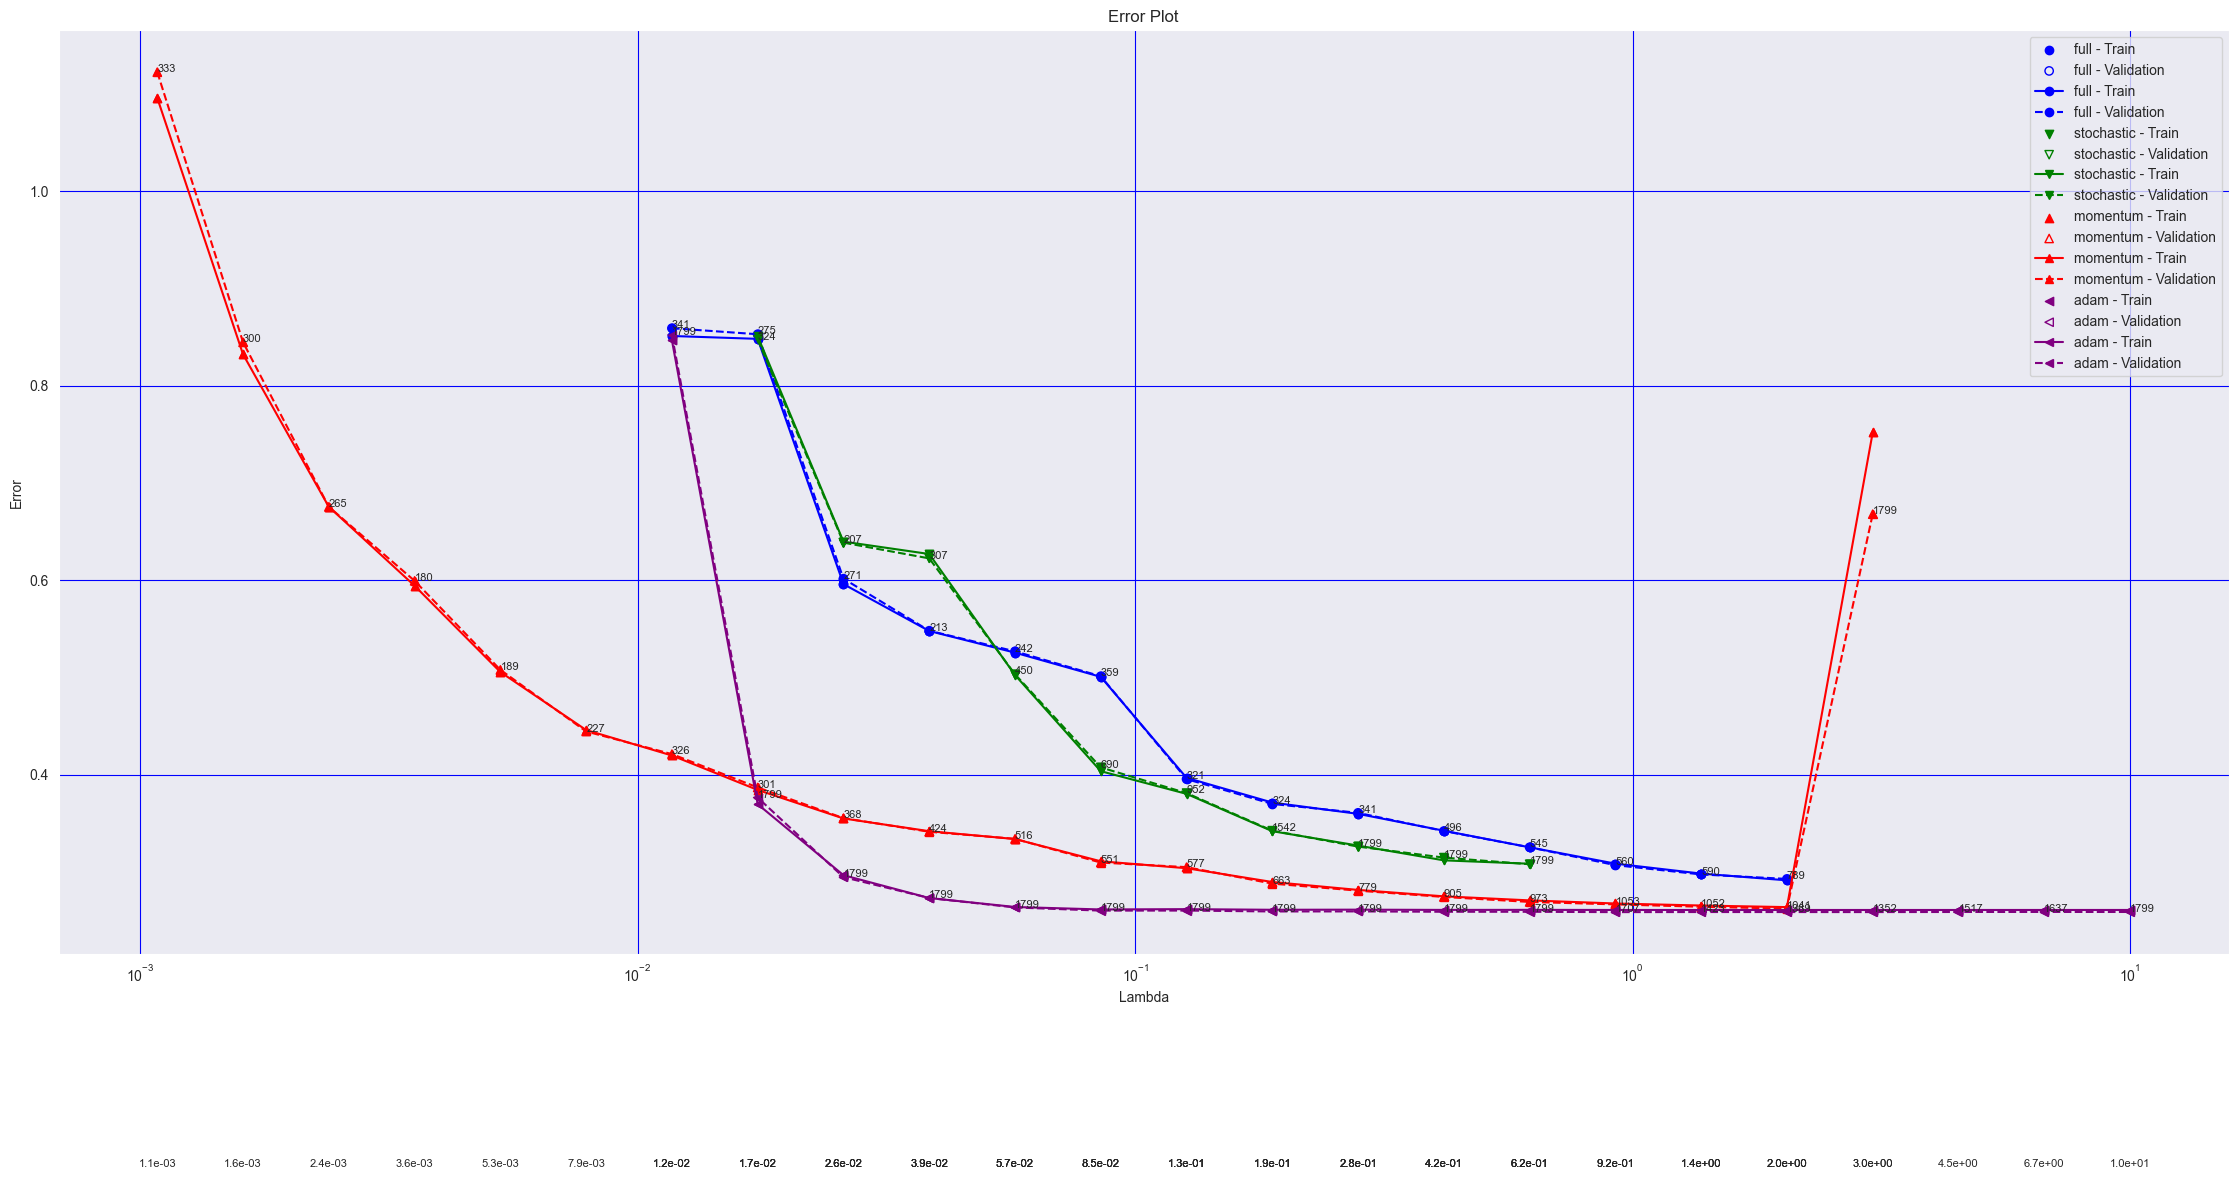

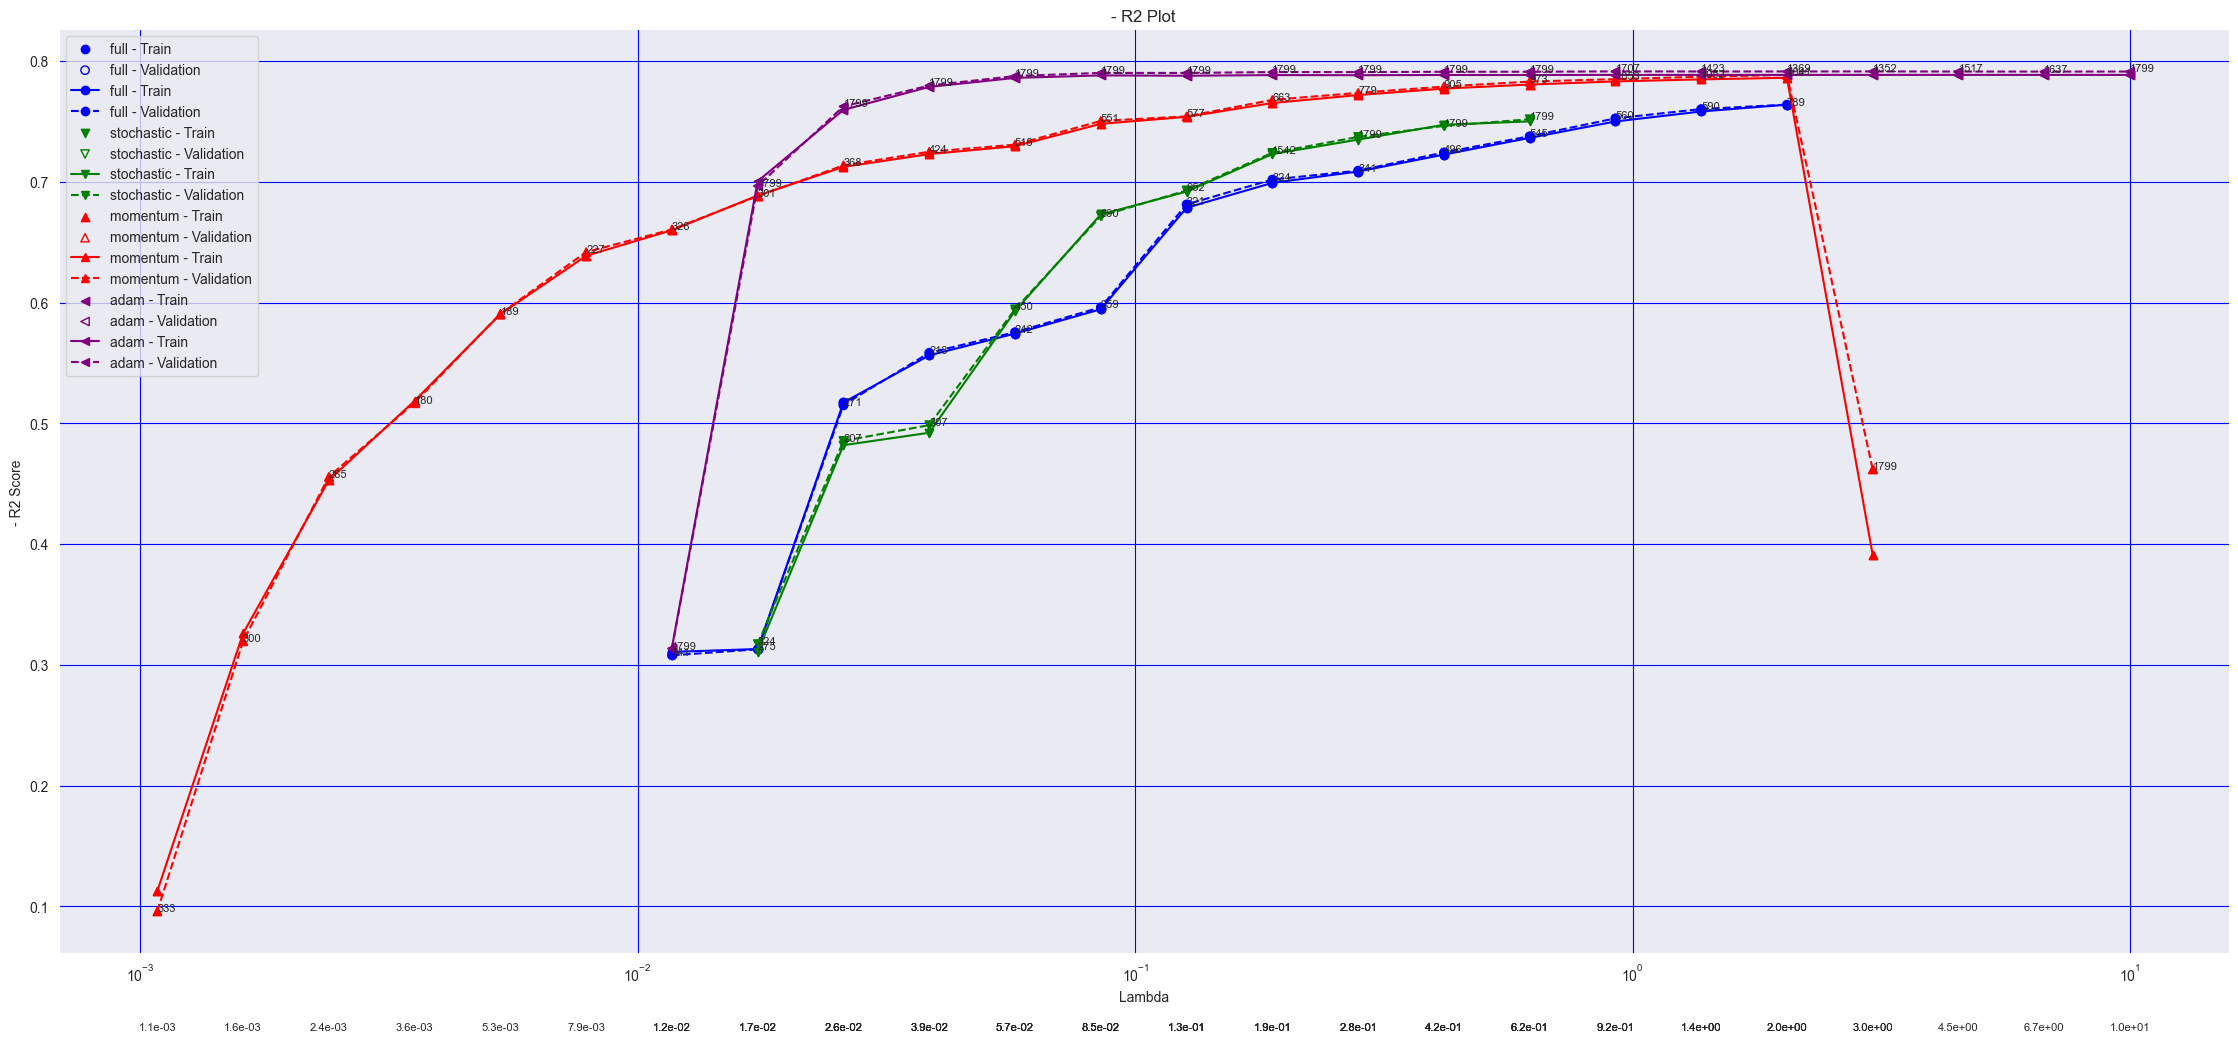

In [48]:
# Load the metrics data from the provided JSON file
with open('metrics/search_lambda.json', 'r') as file:
    metrics = json.load(file)

# Prepare data for plotting
descent_methods = ["full", "stochastic", "momentum", "adam"]
colors = ["blue", "green", "red", "purple"]
markers = ["o", "v", "^", "<"]
plot_data = {method: {"lambdas": [], "train_errors": [], "val_errors": [], "train_r2s": [], "val_r2s": [],
                      "last_iteration_step": []} for method in
             descent_methods}

for method in descent_methods:
    for result in metrics[method]["metrics"]:
        plot_data[method]["lambdas"].append(result["lambda"])
        plot_data[method]["train_errors"].append(result["train_error"])
        plot_data[method]["val_errors"].append(result["val_error"])
        plot_data[method]["train_r2s"].append(result["train_r2"])
        plot_data[method]["val_r2s"].append(result["val_r2"])
        plot_data[method]["last_iteration_step"].append(result["last_iteration_step"])

plot_data = filter_all_metrics(plot_data)

# Plot Error (Train and Validation)
plt.figure(figsize=(28, 12))
for method, color, marker in zip(descent_methods, colors, markers):
    plt.scatter(plot_data[method]["lambdas"], plot_data[method]["train_errors"], color=color, marker=marker,
                label=f"{method} - Train")
    plt.scatter(plot_data[method]["lambdas"], plot_data[method]["val_errors"], color=color, marker=marker,
                facecolors='none', label=f"{method} - Validation")

    sorted_indices = np.argsort(plot_data[method]["lambdas"])
    sorted_lambdas = np.array(plot_data[method]["lambdas"])[sorted_indices]
    sorted_train_errors = np.array(plot_data[method]["train_errors"])[sorted_indices]
    sorted_val_errors = np.array(plot_data[method]["val_errors"])[sorted_indices]

    sorted_last_iteration_steps = np.array(plot_data[method]["last_iteration_step"])[sorted_indices]

    for lambda_value, last_step, y_value in zip(sorted_lambdas, sorted_last_iteration_steps, sorted_val_errors):
        plt.text(lambda_value, y_value, f"{last_step}", fontsize=8)

    # Add text annotations directly on the x-axis
    for lambda_value, last_step, y_value in zip(sorted_lambdas, sorted_last_iteration_steps, sorted_val_errors):
        plt.text(lambda_value, 0, f"{'{:.1e}'.format(lambda_value)}", fontsize=8, ha='center', va='center')

    plt.plot(sorted_lambdas, sorted_train_errors, color=color, marker=marker, linestyle='-', label=f"{method} - Train")
    plt.plot(sorted_lambdas, sorted_val_errors, color=color, marker=marker, linestyle='--',
             label=f"{method} - Validation")

plt.grid(True, color='b', )
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.xscale("log")
# plt.yscale("log")
plt.title("Error Plot")
plt.legend()
plt.savefig(
    f'docs/plot_lambda_loss_different_descent_method_tol_{"{:.1e}".format(tolerance)}_max_iter_{"{:.1e}".format(max_iter)}_num_log_ticks_{num_log_ticks}.png')
# plt.tight_layout()
plt.show()

# Plot R2 (Train and Validation)
plt.figure(figsize=(28, 12))
for method, color, marker in zip(descent_methods, colors, markers):
    plt.scatter(plot_data[method]["lambdas"], plot_data[method]["train_r2s"], color=color, marker=marker,
                label=f"{method} - Train")
    plt.scatter(plot_data[method]["lambdas"], plot_data[method]["val_r2s"], color=color, marker=marker,
                facecolors='none', label=f"{method} - Validation")

    sorted_indices = np.argsort(plot_data[method]["lambdas"])
    sorted_lambdas = np.array(plot_data[method]["lambdas"])[sorted_indices]
    sorted_train_r2s = np.array(plot_data[method]["train_r2s"])[sorted_indices]
    sorted_val_r2s = np.array(plot_data[method]["val_r2s"])[sorted_indices]

    sorted_last_iteration_steps = np.array(plot_data[method]["last_iteration_step"])[sorted_indices]

    for lambda_value, last_step, y_value in zip(sorted_lambdas, sorted_last_iteration_steps, sorted_val_r2s):
        plt.text(lambda_value, y_value, f"{last_step}", fontsize=8)

    # Add text annotations directly on the x-axis
    for lambda_value, last_step, y_value in zip(sorted_lambdas, sorted_last_iteration_steps, sorted_val_r2s):
        plt.text(lambda_value, 0, f"{'{:.1e}'.format(lambda_value)}", fontsize=8, ha='center', va='center')

    plt.plot(sorted_lambdas, sorted_train_r2s, color=color, marker=marker, linestyle='-', label=f"{method} - Train")
    plt.plot(sorted_lambdas, sorted_val_r2s, color=color, marker=marker, linestyle='--', label=f"{method} - Validation")

plt.grid(True, color='b', )
plt.xlabel("Lambda")
plt.ylabel("- R2 Score")
plt.xscale("log")
# plt.yscale("log")
plt.title("- R2 Plot")
plt.legend()

# plt.tight_layout()
plt.savefig(
    f'docs/plot_lambda_r2_score_different_descent_method_tol_{"{:.1e}".format(tolerance)}_max_iter_{"{:.1e}".format(max_iter)}_num_log_ticks_{num_log_ticks}.png')
plt.show()


Для определения наилучшего значения `lambda` и оценки методов оптимизации, нужно учитывать следующие критерии:
- Меньшее значение `last_iteration_step` означает более быструю сходимость.
- Наименьшее значение `val_error` говорит о наименьшей ошибке на валидационной выборке.
- Наибольшее значение `val_r2` указывает на лучшее качество модели.

Для каждого метода подберем оптимальное значение `lambda` исходя из данных критериев:

- **Full Descent**: Наилучшее значение `lambda` судя по наименьшему `val_error` и наибольшему `val_r2` это `0.4175318936560405`, с последним шагом итерации `496`. Это показывает хорошее качество модели и сравнительно высокую скорость сходимости.
- **Stochastic Descent**: Для стохастического спуска, `lambda` с наилучшими показателями `val_error` и `val_r2` это `0.05736152510448681`, с последним шагом итерации `450`. Скорость сходимости выше, чем у полного спуска.
- **Momentum Descent**: Метод с моментом показывает лучшее значение `lambda` равное `0.6210169418915616`, так как `val_error` и `val_r2` являются оптимальными при последнем шаге итерации `973`, что свидетельствует о хорошем балансе между качеством модели и скоростью сходимости.
- **Adam Descent**: Метод Adam показывает отличные результаты на `lambda` равной `0.18873918221350977`, где `val_error` и `val_r2` достигают наилучших значений при достаточно высокой скорости сходимости (последний шаг итерации `1799`).

Исходя из данных по методам, можно сделать вывод, что методы с моментом (Momentum и Adam) показывают лучшие результаты, особенно если учитывать баланс между качеством предсказания и скоростью сходимости. Влияние изменения `lambda` различается для каждого метода: для стохастического спуска и полного спуска необходимо выбирать `lambda` более тщательно для достижения наилучших результатов, в то время как методы с моментом более стабильны и показывают хорошие результаты на более широком диапазоне `lambda`.

In [49]:
best_lambdas = {
    "full": {
        "lambda": 0.4175318936560405,
        "val_error": 0.34215145081120335,
        "val_r2": 0.7242595820713198,
        "last_iteration_step": 496
    },
    "stochastic": {
        "lambda": 0.05736152510448681,
        "val_error": 0.5032945350577207,
        "val_r2": 0.5943941049818511,
        "last_iteration_step": 450
    },
    "momentum": {
        "lambda": 0.6210169418915616,
        "val_error": 0.26930760013859717,
        "val_r2": 0.782964561344028,
        "last_iteration_step": 973
    },
    "adam": {
        "lambda": 0.18873918221350977,
        "val_error": 0.25951271401736453,
        "val_r2": 0.7908582762069323,
        "last_iteration_step": 1799
    }
}

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [50]:
# from utils.regression_helpers import fit_and_evaluate_task52
# 
# 
# def run_in_parallel(num_workers, metrics, tolerance, max_iter, X_train, y_train, X_val, y_val, X_test, y_test):
#     tasks = []
#     with ProcessPoolExecutor(max_workers=num_workers) as executor:
#         for cfg_name, cfg_info in metrics.items():
#             for lambda_value in lambda_range:
#                 task = executor.submit(
#                     fit_and_evaluate_task52,
#                     cfg_name,
#                     lambda_value,
#                     cfg_info["cfg"],
#                     tolerance,
#                     max_iter,
#                     X_train, y_train, X_val, y_val, X_test, y_test
#                 )
#                 tasks.append(task)
# 
#         for future in tqdm(concurrent.futures.as_completed(tasks), total=len(tasks)):
#             cfg_name, result = future.result()
#             metrics[cfg_name]["metrics"].append(result)


╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [51]:
batch_sizes = np.arange(5, 500, 10)

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [52]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [53]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ